<div class="alert alert-info" role="alert">
    <center><h1 style="color:red;"><strong>Econometrics 322 Lab #4a</strong></h1></center><br>
    <center><h2><strong><color:red>Basic OLS Regression</strong></h2></center><br>
</div>


### Data Dictionary

See Lecture 2 discussion about this data.

| Variable | Values   | Source | Mnemonic |
|----------|----------|--------|---------|
| Year of Observation | Nominal, annual 1993 - 2008| Defined | Year |
| Aggregate Consumption | Millions of gallons, annual | Int'l Bottled Water Assoc. | aggConsumption |
| Aggregate Revenue | Millions of dollars, annual, nominal $ | IBID. | aggRevenue |
| Per Capita Consumption | Gallons per person, annual | Calculated | perCapitaCons |
| Nominal Price per Gallon | Nominal dollars | Calculated | price |
| Real Disposable Income per Capita | Real dollars, base \= 2005, annual | Economic R. of Pres. 2010, Tbl. B-31 | realDisIncome |
| Food CPI | Index (Total Food & Beverages) | Economic R. of Pres. 2010, Tbl. B-60 | foodCPI |
| Population | Millions | Economic R. of Pres. 2010, Tbl. B-34 | pop |
| Real Price per Gallon | Real dollars, annual | Calculated | realPrice |

<div class="alert alert-info" role="alert">
</div>

## Tasks


### Load the Pandas and Statsmodels packages and give them aliases.  I recommend 'pd' and 'sm', respectively.  You will also need the Statsmodels formula API for formulas.  See Lesson \#4 for examples.

In [38]:
##
## Enter the code here
##
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import statsmodels as sm
import math as np
import statsmodels.formula.api as api

### Import the water consumption data.  Set the row index to the years.

In [28]:
##
## Enter the code here
##

df = pd.read_csv("lab4.csv")
df.set_index('Year', inplace = True)

### Print the first five (5) records.

In [29]:
##
## Enter the code here
##

df.head()

,aggConsumption,aggRevenue,perCapitaCons,price,realDisIncome,foodCPI,pop,realPrice
Year,,,,,,,,
1993,2689.4,2876.7,10.333711,1.069644,24044,141.6,260.255,0.007554
1994,2966.4,3164.3,11.260420,1.066714,24517,144.9,263.436,0.007362
1995,3226.9,3521.9,12.101314,1.091419,24951,148.9,266.657,0.007330
1996,3495.1,3835.4,12.960800,1.097365,25475,153.7,269.667,0.007140
1997,3794.3,4222.7,13.903016,1.112906,26061,157.7,272.912,0.007057


### Calculate descriptive statistics for all the variables. Intrepret the statistics.

In [30]:
##
## Enter the code here
##

df.describe()

,aggConsumption,aggRevenue,perCapitaCons,price,realDisIncome,foodCPI,pop,realPrice
count,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,5430.256250,6861.73750,18.894761,1.229393,28669.500000,172.676562,283.061750,0.007154
std,2073.808994,3058.03594,6.353614,0.117783,2992.882334,21.470518,13.984216,0.000463
min,2689.400000,2876.70000,10.333711,1.066714,24044.000000,141.600000,260.255000,0.006022
25%,3719.500000,4125.87500,13.667462,1.109021,25914.500000,156.700000,272.100750,0.006995
50%,4955.100000,6496.80000,17.454565,1.291871,29099.000000,171.000000,283.826000,0.007179
75%,6989.750000,9378.90000,23.772322,1.327086,31224.250000,187.750000,293.981000,0.007539
max,8757.400000,11551.50000,29.025501,1.363321,32648.000000,214.225000,304.483000,0.007711


### Create several plots of the data and intrepret the patterns you see.  Add more cells if you need to by clicking on the far left of a code cell and pressing the *b* key on your keyboard.

Text(0, 0.5, 'aggregate revenue')

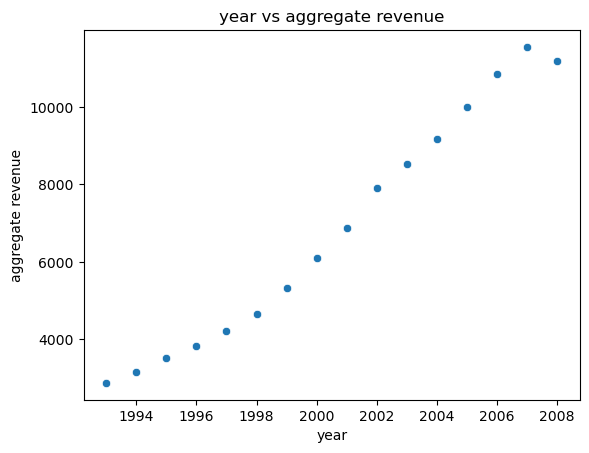

In [39]:
##
## Enter the code here
## year vs agg revenue

import seaborn as sns

sns.scatterplot(data=df, x='Year', y='aggRevenue').set(title='year vs aggregate revenue')
plt.xlabel('year')
plt.ylabel('aggregate revenue')

Text(0, 0.5, 'per capita consumption')

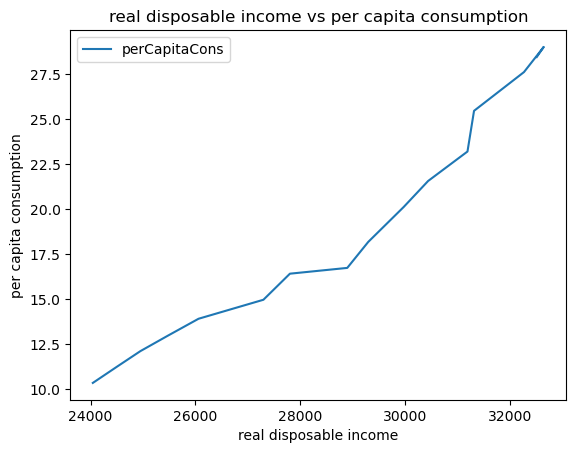

In [37]:
##
## Enter the code here
## real disposable income vs per capita consumption

df.plot(x='realDisIncome', y='perCapitaCons').set(title='real disposable income vs per capita consumption')
plt.xlabel('real disposable income')
plt.ylabel('per capita consumption')

Text(0, 0.5, 'per capita consumption')

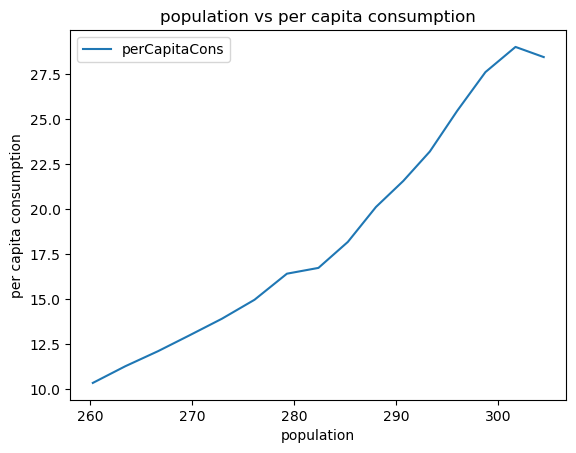

In [40]:
#
## Enter the code here
## population vs per capita consumption

df.plot(x='pop', y='perCapitaCons').set(title='population vs per capita consumption')
plt.xlabel('population')
plt.ylabel('per capita consumption')

Text(0, 0.5, 'per capita consumption')

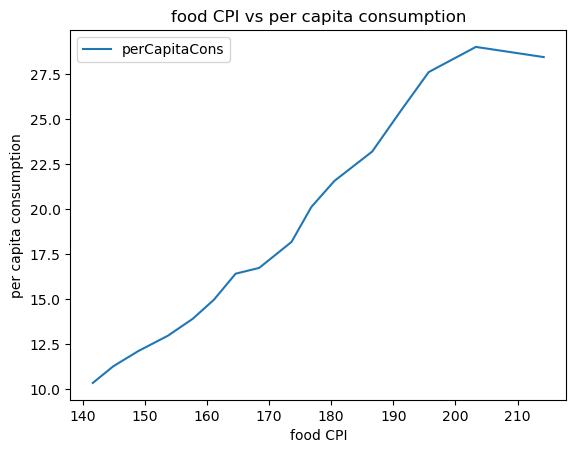

In [41]:
#
## Enter the code here
## food CPI vs per capita consumption

df.plot(x='foodCPI', y='perCapitaCons').set(title='food CPI vs per capita consumption')
plt.xlabel('food CPI')
plt.ylabel('per capita consumption')

### Create a new variable and call it *Decade*.  This new variable will be the decade of the observation.  To create this variable, divide year by 10 and return the whole part of the number.  Then multiply this part by 10.  Work this calculation out on paper to make sure you understand how you will get the decade.  To implement this, try:

df[ 'Decade' ] = ( df.Year//10 ) * 10

### The double forward slashes is the command to divide by 10 and return the whole part of the result. 

In [23]:
##
## Enter the code here
##

df['Decade'] = (df.index//10)*10


### Create a boxplot of per Capita consumption grouped by year.  This is , have one boxplot for the 1990 decade and a second for the 2000 decade, but on one graph axis.  Interpret the graph.

HINT: Try *df.boxplot( by = 'Decade', column = 'price' )*.

Text(0, 0.5, 'price')

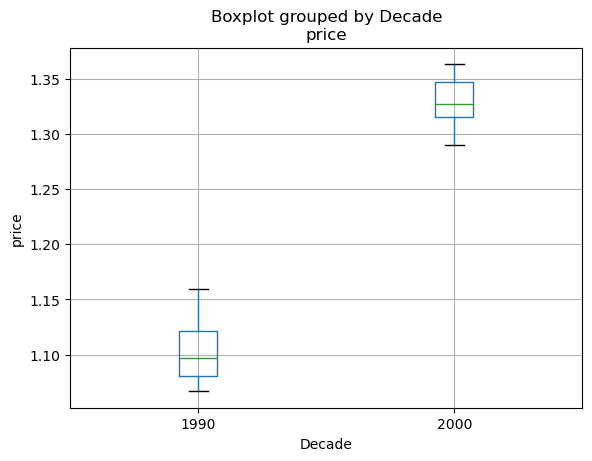

In [47]:
##
## Enter the code here
##

df.boxplot( by = 'Decade', column = 'price' )
plt.ylabel('price')

###  Estimate an OLS model using per capita consumption as the dependent variable and real price as the independent variable.  Display the summary report.  See Lesson \#4 for an example.

In [44]:
##
## Enter the code here
##
import statsmodels.api as sm

y = df['perCapitaCons']
x = df['realPrice']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          perCapitaCons   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     8.453
Date:                Tue, 16 Jan 2024   Prob (F-statistic):             0.0115
Time:                        11:48:23   Log-Likelihood:                -47.992
No. Observations:                  16   AIC:                             99.98
Df Residuals:                      14   BIC:                             101.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.1733     20.774      3.811      0.0

/Users/dhiyajayadevan/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Retrieve and display the estimated parameters.

In [58]:
##
## Enter the code here
##

print(model.params)


const          79.173267
realPrice   -8425.805928
dtype: float64


### Retrieve the residuals and verify that the sum of the residuals is zero.  

In [43]:
##
## Enter the code here
##

model.resid


Year
1993   -5.191169
1994   -5.884389
1995   -5.311815
1996   -6.055128
1997   -5.808411
1998   -5.132405
1999   -3.405572
2000    2.291642
2001    3.408825
2002    5.920900
2003    5.875746
2004    4.861322
2005    4.793944
2006    5.091822
2007    4.520750
2008    0.023940
dtype: float64

### Calculate the standard error of the regression.

In [71]:
##
## Enter the code here
##

sse = model.ssr
se_reg_alt_02 = np.sqrt(sse/model.df_resid)
print(round(se_reg_alt_02, 3))

5.193


<div class="alert alert-success" role="alert">
  <center><h4 class="alert-heading">Well done!</h4></center>
</div>